In [1]:
from numpy import *
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.table import QTable
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck15
plt.style.use(astropy_mpl_style)

import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import re

In [2]:
pathx = os.path.expanduser('~/Downloads/')
Anshux = pd.read_csv(os.path.expanduser(pathx+'jades_z3_F444Wsn5.csv'))
Anshux

,ID,RA_x,DEC_x,F090W_KRON,F090W_KRON_S,F090W_SEG,F115W_KRON,F115W_KRON_S,F115W_SEG,F150W_KRON,...,EAZY_l95,EAZY_u95,EAZY_l99,EAZY_u99,EAZY_nfilt,z_spec,z_spec_source,z_spec_quality,z_spec_reference,best_z
0,76297,53.168984,-27.845815,10.700167,5.494094,9.179753,12.818805,6.350724,10.930993,21.673010,...,2.525,3.220,2.026,3.426,14.0,NaN,NaN,NaN,NaN,2.56
1,76427,53.171861,-27.845702,1.266539,1.035466,0.975875,2.788856,2.169220,2.350424,1.807468,...,0.193,11.657,0.125,14.168,14.0,NaN,NaN,NaN,NaN,3.40
2,76434,53.171057,-27.845679,7.393779,4.109322,6.589133,4.724438,2.445822,4.293111,7.999013,...,0.213,3.770,0.035,5.570,14.0,NaN,NaN,NaN,NaN,2.68
3,76448,53.168965,-27.845676,0.328738,0.468432,0.589152,0.865501,1.091656,1.107721,0.123139,...,1.085,21.532,0.815,21.967,14.0,NaN,NaN,NaN,NaN,4.33
4,76692,53.170117,-27.845425,6.215739,3.838256,5.618910,4.777024,3.057096,4.461135,5.269295,...,0.019,2.697,0.011,3.328,14.0,NaN,NaN,NaN,NaN,2.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9144,268888,53.170806,-27.783677,1.055300,1.161099,1.308549,1.185059,0.933802,1.436017,1.392953,...,0.037,4.224,0.011,11.981,19.0,NaN,NaN,NaN,NaN,3.43
9145,268891,53.171324,-27.787725,3.933827,2.204847,4.028739,4.135537,2.253502,4.195924,5.897985,...,4.338,4.788,0.561,4.851,19.0,NaN,NaN,NaN,NaN,4.41
9146,268892,53.171447,-27.787780,2.469278,2.263243,2.469278,3.848855,3.288079,3.848855,5.524940,...,0.544,4.767,0.453,4.843,19.0,NaN,NaN,NaN,NaN,4.38
9147,268908,53.132317,-27.782921,48355.450000,37643.992000,55661.480000,56411.344000,43758.630000,65284.203000,66693.000000,...,3.361,3.511,3.305,3.549,11.0,NaN,NaN,NaN,NaN,3.46


In [3]:
file = fits.open(os.path.expanduser('~/Desktop/Data/JWST/JADES_phot.fits'))
df=Table(file[7].data).to_pandas()
Anshu=pd.merge(left=Anshux['ID'],right=df, left_on=Anshux['ID'],right_on=df['ID'])
Anshu['redshift']=Anshux['best_z']
Anshu

,key_0,ID_x,ID_y,RA,DEC,F090W_KRON,F090W_KRON_S,F090W_SEG,F115W_KRON,F115W_KRON_S,...,F125W_KRON_e,F125W_KRON_S_e,F125W_SEG_e,F140W_KRON_e,F140W_KRON_S_e,F140W_SEG_e,F160W_KRON_e,F160W_KRON_S_e,F160W_SEG_e,redshift
0,76297,76297,76297,53.168984,-27.845815,11.467105,8.209058,8.933901,14.020300,9.282278,...,12.214595,5.553940,7.260708,28.773947,15.511089,18.570930,14.811960,6.493876,8.953582,2.56
1,76427,76427,76427,53.171861,-27.845702,0.330489,0.629070,1.068384,2.857395,1.723422,...,8.091146,5.876614,6.175933,20.763920,-18.159136,16.599720,9.820548,6.744327,7.554826,3.40
2,76434,76434,76434,53.171057,-27.845679,7.089671,3.912302,6.522440,5.211615,2.552283,...,8.826793,-4.988881,7.445066,24.080851,15.290194,20.816086,12.236980,6.236199,10.300578,2.68
3,76448,76448,76448,53.168965,-27.845676,1.046121,0.785433,1.863514,1.156077,1.448450,...,7.690878,5.255977,5.358263,20.747358,15.784733,15.248575,9.834814,6.143270,6.863523,4.33
4,76692,76692,76692,53.170117,-27.845425,6.142127,2.108101,5.967657,4.261994,1.699531,...,7.412185,-5.962348,6.595723,20.046820,-18.740374,18.245449,9.108844,8.114180,8.154630,2.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9144,268888,268888,268888,53.170806,-27.783677,0.913031,0.643173,0.675894,0.615224,0.011739,...,1.200921,1.268031,1.258662,1.281645,-1.327953,1.343806,1.371521,1.314519,1.441013,3.43
9145,268891,268891,268891,53.171324,-27.787725,4.315679,3.253985,4.562337,3.559963,3.113179,...,2.177198,0.973927,1.309367,2.372519,0.994906,1.414454,2.678100,1.026971,1.565350,4.41
9146,268892,268892,268892,53.171447,-27.787780,2.274557,1.558142,2.274557,2.988134,2.251143,...,1.886375,0.815435,1.192030,2.124532,1.258190,1.320423,2.390767,1.295736,1.461054,4.38
9147,268908,268908,268908,53.132317,-27.782921,55117.429688,46933.683594,60460.031250,56448.046875,46913.382812,...,74.526924,46.144661,383.414551,254.637451,196.284210,832.793091,79.344589,53.869217,340.760468,3.46


In [4]:
column_names = Anshu.columns #JadesCam.columns

# Create an empty DataFrame to store the results
Fluxes = pd.DataFrame()

# Iterate over the column names
for column_name in column_names:
    # Check if the column is a flux column (e.g., 'F105W_flux')
    if column_name.endswith('_KRON'):
        error_column = column_name[:-5] + '_KRON_e'
        if error_column in column_names:
            Fluxes[column_name] = Anshu[column_name]
            Fluxes[error_column] = Anshu[error_column]

Fluxes.insert(0,'id',Anshu['ID_x'].astype('<i4'))
Fluxes.insert(1,'redshift',Anshu['redshift'])
Fluxes.columns = Fluxes.columns.str.replace('_KRON','')
Fluxes.columns = Fluxes.columns.str.replace('_e','*')
Fluxes[Fluxes.columns[2:]] = Fluxes[Fluxes.columns[2:]].mul(10**-9)
# # Fluxes = Fluxes.loc[:, Fluxes.columns != 'id'].mul(10**-6)
Fluxes

,id,redshift,F090W,F090W*,F115W,F115W*,F150W,F150W*,F182M,F182M*,...,F850LP,F850LP*,F105W,F105W*,F125W,F125W*,F140W,F140W*,F160W,F160W*
0,76297,2.56,1.146710e-08,3.677853e-09,1.402030e-08,2.617099e-09,2.290547e-08,2.693149e-09,0.000000e+00,NaN,...,2.899847e-08,1.167715e-08,1.102308e-08,6.868680e-09,7.439479e-09,1.221459e-08,2.468581e-08,2.877395e-08,1.603133e-08,1.481196e-08
1,76427,3.40,3.304886e-10,1.409935e-09,2.857395e-09,1.068135e-09,1.457392e-09,1.328248e-09,0.000000e+00,NaN,...,1.372995e-08,7.045255e-09,-3.494591e-09,4.249640e-09,2.425161e-09,8.091146e-09,-2.160383e-08,2.076392e-08,3.832201e-09,9.820548e-09
2,76434,2.68,7.089671e-09,2.294799e-09,5.211615e-09,1.633311e-09,8.458733e-09,1.659915e-09,0.000000e+00,NaN,...,3.961957e-09,9.577988e-09,5.804435e-09,5.125524e-09,-3.162556e-09,8.826793e-09,1.798891e-08,2.408085e-08,9.877991e-09,1.223698e-08
3,76448,4.33,1.046121e-09,1.556074e-09,1.156077e-09,1.168527e-09,7.872055e-10,1.479292e-09,0.000000e+00,NaN,...,-1.379469e-10,7.425719e-09,-3.535005e-09,4.377136e-09,5.271996e-09,7.690877e-09,3.370341e-08,2.074736e-08,-9.615000e-10,9.834814e-09
4,76692,2.62,6.142127e-09,1.262609e-09,4.261994e-09,8.818349e-10,4.786598e-09,1.101657e-09,0.000000e+00,NaN,...,-5.302723e-09,6.231583e-09,2.792231e-09,3.734011e-09,-7.330914e-10,7.412185e-09,2.253856e-09,2.004682e-08,5.778499e-09,9.108843e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9144,268888,3.43,9.130313e-10,6.769338e-10,6.152236e-10,5.296253e-10,1.452247e-09,6.753091e-10,7.314132e-10,6.596757e-10,...,-1.066534e-09,1.215115e-09,-1.567512e-11,8.675231e-10,4.039047e-10,1.200921e-09,-2.129346e-09,1.281645e-09,7.728480e-10,1.371521e-09
9145,268891,4.41,4.315678e-09,1.553846e-09,3.559963e-09,1.320605e-09,5.579781e-09,1.456018e-09,4.701157e-09,2.581082e-09,...,6.020157e-09,2.443878e-09,6.611586e-09,1.910131e-09,9.248710e-09,2.177198e-09,8.640182e-09,2.372519e-09,9.066273e-09,2.678100e-09
9146,268892,4.38,2.274557e-09,1.387618e-09,2.988134e-09,1.147337e-09,4.178708e-09,1.317957e-09,2.902447e-09,2.316873e-09,...,4.379113e-09,2.185338e-09,5.217981e-09,1.735987e-09,8.318125e-09,1.886375e-09,8.982738e-09,2.124532e-09,1.140328e-08,2.390766e-09
9147,268908,3.46,5.511743e-05,3.660987e-08,5.644805e-05,3.904668e-08,6.674821e-05,NaN,0.000000e+00,NaN,...,1.257872e-04,1.913181e-08,1.433152e-04,8.991810e-08,1.505019e-04,7.452692e-08,1.715103e-04,2.546375e-07,1.767386e-04,7.934459e-08


In [ ]:
Megalodon = pd.DataFrame({'Name': pd.Series(dtype='str'),
                   '$\lambda_c$': pd.Series(dtype='float'),
                   'Filter_ID': pd.Series(dtype='int'),
                      'Fit?':pd.Series(dtype='int')})#Removed the unused filters and will sort them by wavelength below
d = {'Name': ['F090W', 'F115W', 'F150W', 'F182M', 'F200W', 'F210M', 'F277W',
       'F335M', 'F356W', 'F410M', 'F430M', 'F444W', 'F460M', 'F480M', 'F435W',
       'F606W', 'F775W', 'F814W', 'F850LP', 'F105W', 'F125W', 'F140W',
       'F160W'], 
     '$\lambda_c$': [9083.40,11623.88,15104.23,18494.30,20028.15,20982.22,27844.64,
                    33675.24,35934.49,40886.54,42812.58,44393.52,46315.57,48213.27,4360.06,
                    6000.74,7693.47,8127.45,9031.48,10651.00,12576.18,14061.91,15436.30],
     'Filter ID':[477,478,480,484,486,487,490,
                494,495,498,499,500,501,504,214,
                 215,216,126,217,366,328,329,330],
     'Fit?':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}
Megalodon = pd.DataFrame(data=d)
Megalodons2=Megalodon.copy()
Megalodons2['$\lambda_{min}$']=[7881.88,9975.60,13041.19,16959.53,17249,19618.54,23673.12,31203.36
                                ,30732.91,37763.56,41227.68,38039.57,44652.64,45820.02,3610.23,4712.79,
                                6803.72,6978.64,8007.01,8955.24,10853.22,11864.94,13857.70]
Megalodons2['$\lambda_{max}$']=[10243.08,13058.40,16948.89,20010.97,22596.64,22337.29,32203.22,
                               36442.23,40801.26,44048.41,44448.79,50995.50,48146.41,50919.02,4883.77,
                               7208.10,8631.82,9695.01,10862.13,12130.55,14141.73,16133.14,17003.09]
Megalodons=Megalodon.sort_values(by=['$\lambda_c$'])
Megalodons['$\lambda_c$']=Megalodons['$\lambda_c$'].mul(10**-4)
Megalodons2=Megalodons2.sort_values(by=['$\lambda_c$'])
Megalodons2['$\lambda_{min}$']=Megalodons2['$\lambda_{min}$']
Megalodons2['$\lambda_{max}$']=Megalodons2['$\lambda_{max}$']
Megalodons2['$\lambda_c$']=Megalodons2['$\lambda_c$'].mul(10**-4)
Megalodons2

In [ ]:
Sanity = Megalodons['Name']+'*'
WhyAreYou = Fluxes['redshift']
MyRemedy = Fluxes[Megalodons['Name']]
MyClarity = Fluxes[Sanity]

In [ ]:
HayleyWilliams =pd.DataFrame(data=Fluxes['id'])

for col in MyRemedy.columns:
    HayleyWilliams =HayleyWilliams.join(MyRemedy[col.replace('*','')])
    HayleyWilliams =HayleyWilliams.join(MyClarity[col+'*'])
    
HayleyWilliams.insert(1,'redshift',WhyAreYou)
# HayleyWilliams=HayleyWilliams.sort_values(by='id', ascending=True)
HayleyWilliams

In [ ]:
# O3_2=5007
# obsO3_2 = HayleyWilliams['redshift']*O3_2 +O3_2
pd.set_option('display.max_columns', None)
for i in range(len(HayleyWilliams)):
    for j in range(1,24):
        if HayleyWilliams.iloc[i,j*2] < 0:
            HayleyWilliams.iloc[i,j*2+1] = -94
            HayleyWilliams.iloc[i,j*2] =-95
        if pd.isna(HayleyWilliams.iloc[i,j*2+1]):
            HayleyWilliams.iloc[i,j*2+1] = -96
            HayleyWilliams.iloc[i,j*2] =-97
        if HayleyWilliams.iloc[i,j*2] == 0:
            HayleyWilliams.iloc[i,j*2+1] = -96
            HayleyWilliams.iloc[i,j*2] =-97
#         if obsO3_2[i]>Megalodons2['$\lambda_{min}$'].iloc[j-1] and obsO3_2[i]<Megalodons2['$\lambda_{max}$'].iloc[j-1]:
#             HayleyWilliams.iloc[i,2*j]=-105
#             HayleyWilliams.iloc[i,2*j+1]=-110
HayleyWilliams


In [ ]:
ZacEfron = HayleyWilliams[:4800]
VanessaHudgens = HayleyWilliams[4800:]

In [ ]:
VanessaHudgens

In [ ]:
ZacEfron

In [ ]:
# HayleyWilliams.to_csv('anshu_4_EELGs.csv',index=False)
ZacEfron.to_csv('Anshu_bigset1.csv',index=False)
VanessaHudgens.to_csv('Anshu_bigset2.csv',index=False)

This is the start of the Parameter scooping portion

In [9]:
path = os.path.expanduser('~/Documents/ZFOURGE2/')
Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
SEDParams = ['fmuopt','fmuir','tform','gamma','metals','odepthbc','mu2','M','sfr2','lum2']
final_data = []
# Loop through each row in Montague
for index, row in Montague.iterrows():
    potato = str(row['id'])
    potato = potato[:-2]
    
    with open(os.path.expanduser(path + '/' + potato + '.sed')) as f:
        lines = f.readlines()
#         values = re.findall(r'[-+]?\d*\.\d+|\d+', lines[3])  # Extract numerical values from the 4th line
        values = re.findall(r'[+-]?(\d+\.\d+E[+-]?\d+|\d+\.\d+|\.\d+|\d+)', lines[3])
        
        # Create a dictionary for the current row
        row_data = {'id': potato}
        for col, value in zip(SEDParams, values):
            row_data[col] = float(value)  # Convert values to float
            
        # Append the row data to the final_data list
        final_data.append(row_data)

# Create the final dataframe
final_dataframe = pd.DataFrame(final_data).set_index('id')
final_dataframe.insert(0, 'id', final_dataframe.index)
final_dataframe.reset_index(drop=True, inplace=True)
final_dataframe['id'] = final_dataframe['id'].astype(int)





Parameters=['sfh','IR fmu','mu','tau_V','sSFR','M(stars)','L(dust)','T_C^ISM','T_W^BC','chi_C^tot','chi_PAH^tot','chi_MIR^tot','chi_W^tot','tau_V^ISM','M(dust)','SFR','A_V','age','Tdust','lg(M/Lh)','lg(M/Lk)']
# Parameters=['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
Cheesy=[]
Toasty=[]
runawayslowly=[]
twochillies = []
for Curl in range(len(Montague)):
    potato=str(Montague['id'][Curl])
#     potato=str(735)
    print(potato)
    Minestrone = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip', )
    Minestrone2 = pd.DataFrame(columns=['Full'])
    potato=int(potato)
    redshift =float(Minestrone.index[6].split()[-1])
    runawayslowly.append(redshift)
    chi2 = float(Minestrone.index[6].split()[2])
    twochillies.append(chi2)
    line = Minestrone.index[8].split(" ")
    while("" in line):
        line.remove("")
    str_line = " ".join(str(item) for item in line)
    Minestrone2.loc[0]=str(str_line)
    Minestrone2[Parameters] = Minestrone2['Full'].str.split(" ",expand=True,)
    Minestrone2=Minestrone2.drop(['Full'],axis=1)
    Cheesy.append(Minestrone2.iloc[0])
    Toasty.append(potato)

6020
6235
6329
6465
6525
6738
6844
6849
6852
6900
6909
6988
7071
7158
7182
7243
7346
7396
7408
7487
7533
7577
7612
7624
7706
7732
7752
7814
7817
7856
7867
7932
8024
8116
8154
8250
8272
8366
8428
8483
8560
8575
8643
8647
8653
8697
8722
8841
8851
8904
8922
8923
8941
8959
8989
9019
9084
9087
9124
9217
9323
9332
9415
9416
9512
9517
9584
9586
9631
9652
9657
9691
9698
9739
9747
9801
9803
9805
9833
9861
9874
9883
9894
9925
9930
10008
10017
10018
10055
10066
10092
10109
10120
10146
10152
10161
10214
10224
10246
10252
10287
10316
10402
10406
10407
10415
10441
10449
10489
10490
10514
10590
10614
10627
10633
10672
10677
10695
10720
10834
10862
10926
10930
10936
10963
10972
11006
11037
11058
11068
11076
11084
11092
11105
11137
11167
11172
11184
11200
11203
11218
11269
11336
11396
11398
11433
11440
11462
11493
11522
11541
11548
11586
11594
11621
11642
11648
11707
11714
11750
11777
11783
11784
11861
11867
11923
11977
11999
12006
12030
12047
12070
12087
12088
12115
12158
12176
12223
12273
12327
12332

In [10]:
INeedHelp=Table(Cheesy).to_pandas()
INeedHelp=transpose(INeedHelp).reset_index(drop=True)
INeedHelp.columns = [Parameters]
INeedHelp.insert(0,'Galaxy_ID',Toasty) #Galaxy_ID
INeedHelp.insert(1,'redshift',runawayslowly) #redshift
INeedHelp.insert(23,'chi2',twochillies) #chi2
INeedHelp
INeedHelp.to_csv('ZFOURGE2-Parameters.csv',index=False)
# INeedHelp.to_csv('JSN2-Parameters.csv',index=False)
Diseased = pd.read_csv(os.path.expanduser('~/notebook/Laptop/'+'ZFOURGE2-Parameters.csv')) 
NewParamFile = pd.merge(Diseased, final_dataframe, left_on='Galaxy_ID', right_on='id')# NewParamFile = .merge(final_dataframe, left_on='Galaxy_ID', right_on='id', how='left')
NewParamFile

,Galaxy_ID,redshift,sfh,IR fmu,mu,tau_V,sSFR,M(stars),L(dust),T_C^ISM,...,fmuopt,fmuir,tform,gamma,metals,odepthbc,mu2,M,sfr2,lum2
0,6020,2.50071,0.892,0.855,0.786,0.137,1.319000e-11,2.278000e+11,6.174000e+10,71.7,...,0.892,0.855,1.438000e+09,1.594,1.016,0.137,0.786,2.278000e+11,1.371000e-11,6.173000e+10
1,6235,2.77694,0.326,0.463,0.034,0.788,1.255000e-08,9.370000e+09,1.085000e+12,49.7,...,0.326,0.463,1.863000e+08,1.189,0.267,0.788,0.034,9.370000e+09,9.893000e-09,1.085000e+12
2,6329,2.55376,0.329,0.463,0.379,2.301,9.543000e-09,2.396000e+10,2.246000e+12,49.7,...,0.329,0.463,2.614000e+08,0.379,0.727,2.301,0.379,2.396000e+10,8.035000e-09,2.250000e+12
3,6465,2.80100,0.482,0.463,0.904,0.040,6.435000e-10,3.826000e+10,3.609000e+10,49.7,...,0.482,0.463,1.829000e+09,1.374,0.073,0.039,0.904,3.826000e+10,6.672000e-10,3.609000e+10
4,6525,2.87872,0.423,0.463,0.967,0.869,1.046000e-09,9.250000e+10,9.211000e+11,49.7,...,0.423,0.463,1.854000e+09,0.705,1.959,0.869,0.966,9.250000e+10,1.055000e-09,9.223000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,30249,2.50950,0.294,0.463,0.219,1.108,1.574000e-08,1.573000e+10,2.378000e+12,49.7,...,0.294,0.463,1.449000e+08,1.322,0.059,1.108,0.219,1.573000e+10,1.130000e-08,2.385000e+12
678,30397,3.51017,0.343,0.463,0.920,0.425,1.429000e-08,5.468000e+09,5.457000e+11,49.7,...,0.343,0.463,1.148000e+09,1.020,0.038,0.425,0.921,5.468000e+09,9.521000e-09,5.460000e+11
679,30465,3.49404,0.465,0.463,0.975,0.959,3.014000e-09,5.992000e+10,2.018000e+12,49.7,...,0.465,0.463,7.892000e+08,0.736,0.203,0.959,0.975,5.992000e+10,2.931000e-09,2.019000e+12
680,30690,2.67692,0.354,0.463,0.828,0.098,7.008000e-09,2.425000e+10,4.730000e+11,49.7,...,0.354,0.463,3.333000e+08,1.253,0.037,0.098,0.828,2.425000e+10,6.378000e-09,4.729000e+11


In [11]:
NewParamFile.to_csv('ZFOURGE2-Parameters-all.csv',index=False)

In [ ]:
# x=pd.read_csv(os.path.expanduser('~/notebook/Laptop/'+'Anshu2-Parameters.csv')) 
# y=pd.read_csv(os.path.expanduser('~/notebook/Laptop/'+'Anshu3-Parameters.csv')) 
# result = pd.concat([x, y], axis=0, ignore_index=True)
# result.to_csv('Anshu-9150-Parameters.csv',index=False)

In [5]:
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    return fig,ax1,ax2,ax3
def StackedPlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                hspace=0.01,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=11,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    
    fig,axarr =plt.subplots(2,1,figsize=(size_x,size_y),sharex=True,sharey=True)
    gs=gridspec.GridSpec(2,1,height_ratios=(9, 1))
    gs.update(hspace=hspace)
    
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax1.set_xticklabels([],c='w')
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xticks([3,4,5,6,7,8])
    ax2.set_yticks([-1,0,1])
#     ax2.
#     ax2.set_xlim
    
#     ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    if Grid:
        axs[0].grid()
        axs[1].grid()
    ax1.grid(False)
    return fig,ax1,ax2

In [15]:
from scipy import stats
from scipy.stats import linregress
def linear_slope_cutoff(x,y,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    slope, intercept,r_value, p_value, std_err = stats.linregress(log10(x_cutoff), log10(y_cutoff))
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,intercept, std_err

from scipy.optimize import curve_fit

def linear_func(x,a,b):
    return a*x+b
def slope_curve_fit(x,y,y_err,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    y_cutoff_err = y_err[mask]
#     print(y_cutoff_err)
    slope = np.nan
    slope_err = np.nan
    intercept = np.nan
    for i in y_cutoff.index:
        if y_cutoff[i] < 0:
            y_cutoff[i] = nan
            y_cutoff_err[i] = nan
#     for i in y_cutoff.index:
#         if y_cutoff[]
    valid_indices = np.sum(~np.isnan(y_cutoff))

    if valid_indices >= 3:
        mask3 = ~np.isnan(y_cutoff)
        x_cutoff = x_cutoff[mask3]
        y_cutoff = y_cutoff[mask3]
        y_cutoff_err = y_cutoff_err[mask3]
        mask2 = np.logical_not(np.isnan(y_cutoff))
        x_cutoff=x_cutoff[mask2]
        y_cutoff=y_cutoff[mask2]
        y_cutoff_err=y_cutoff_err[mask2]

    #     sigma = y_cutoff_err/np.sqrt(len(x_cutoff))
        mango = log10(y_cutoff_err+y_cutoff)
        peach = log10(y_cutoff)
        sigma= (mango-peach)
    #     print(sigma)

        popt,pcov, = curve_fit(linear_func,log10(x_cutoff), log10(y_cutoff), sigma=sigma, absolute_sigma=True)

        slope = popt[0]
        intercept = popt[1]
        slope_err = np.sqrt(pcov[0][0])
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,slope_err, intercept#, x_fit, y_fit
#scipy curvefit
c=2.998e8
h= 6.626*10**-27#erg*s (1 J = 10**7 ergs, h is traditionally in units of J*s)
#solar luminosity ~ 3.828 *10**33 erg/s #3.846 *10**33
def integral_above_cutoff(L_nu, nu, const):
    cutoff_freq = c / (91.2e-9)
    mask = nu>cutoff_freq
    nu_above_cutoff = nu[mask]
    L_nu_above_cutoff = L_nu[mask]
    dnu = np.diff(nu_above_cutoff)
#     integrand_above_cutoff = integrand(nu_above_cutoff,L_nu_above_cutoff)
    integrand_above_cutoff = L_nu_above_cutoff[1:]/(h*nu_above_cutoff[1:])
#     print(L_nu_above_cutoff[1:])
    integral = np.sum(dnu*integrand_above_cutoff)
#     integral = np.trapz(integrand_above_cutoff, nu_above_cutoff)
    return -integral/(const)#const was x3.846*10**33

In [49]:
path = os.path.expanduser('~/Documents/MT2MT2/')
patho = os.path.expanduser('~/Documents/MT2MT2B/')
folder_name = os.path.basename(patho.rstrip('/'))  # Get the folder name "anshuB"
name_B = folder_name[:-1]
Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat'))
light=2.998*(10**18) #speed of light in Angstroms ~ A/s
for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     print(i)
#     potato=str(22839)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    redshift =float(galaxy_fit.index[6].split()[-1])
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=None, header=None,on_bad_lines='skip', skiprows=10,delim_whitespace=True)
    galaxy_sed.columns = ['A', 'B', 'C']
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    lambda_cA = lambda_c*10000
    
    A=galaxy_sed['A']
    B=galaxy_sed['B']
    C=galaxy_sed['C']
    B = np.array(B)
    A = np.array(A) 
    C = np.array(C)
    L_lambda = 10**B
    L_lambda = L_lambda*3.846*10**33 #  Luminosity in wavelength space (erg/s/A)
    L_lambdaU = 10**C #erg/s/Angstroms
    L_lambdaU = L_lambdaU*3.846*10**33
    lambd = 10**A #Angstroms
    lambd = lambd/(1+redshift) #rest frame wavelength in Angstroms
    L_nu1 = L_lambda*lambd**2/light # Luminosity in frequency space (erg/s/Hz)
    L_nu2 = L_lambdaU*lambd**2/light
#     lambd = lambd/(1+redshift)
    nu = light/lambd #rest frame frequency in Hertz
    dfdf = pd.concat([pd.Series(lambd).rename('lambd'),pd.Series(L_lambda).rename('L_lambdaA'),
                  pd.Series(L_lambdaU).rename('L_lambdaU'),pd.Series(nu).rename('nu'),pd.Series(L_nu1).rename('L_nuA'),
                  pd.Series(L_nu2).rename('L_nuU')], axis=1)
#     print(redshift)
#     Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=14: #40,23,14
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
#     names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    
    test=Table.from_pandas(galaxy_fit2)
    L_nu40_er=[float(s) for s in test[1]] #1 for error 0 for flux
    L_nu40_er=np.array(L_nu40_er)
    L_lambda40_er=L_nu40_er*light/(lambda_cA)**2
    file_path = f"{patho}/"+str(potato)+"photom_Ll_er.csv"
    pd.Series(L_lambda40_er).rename('L_lambda40_er').to_csv(file_path,index=False)
    L_nu40=[float(s) for s in test[0]] #1 for error 0 for flux
    L_nu40=np.array(L_nu40)
    L_lambda40=L_nu40*light/(lambda_cA)**2
    file_path = f"{patho}/"+str(potato)+"photom_Ll.csv"
    pd.Series(L_lambda40).rename('L_lambda40').to_csv(file_path,index=False)
    file_path = f"{patho}/"+str(potato)+"-RF-lum"+name_B
    dfdf.to_csv(file_path)
    
print('Data collated')
print('God you\'re smart')
print(dfdf)
beta=[]
beta_er=[]
betaU=[]
betaU_er=[]
betaP=[]
betaP_er=[]
# sion=[]
bouwen=[]
bouwenA=[]

for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     print(potato)
#     potato=str(6020)#10017 #7071   
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    lambda_cA = lambda_c*10000
    L = pd.read_csv(os.path.expanduser(patho+potato+'photom_Ll.csv'))
    L_lambda40=L['L_lambda40']
    Lx = pd.read_csv(os.path.expanduser(patho+potato+'photom_Ll_er.csv'))
    L_lambda40_er=Lx['L_lambda40_er']
#     L2 = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'))
    L2 = pd.read_csv(os.path.expanduser(patho+potato+'-RF-lum'+name_B))
    lambd=L2['lambd']
    L_lambda=L2['L_lambdaA']
    L_lambdaU=L2['L_lambdaU']
    redshift =float(galaxy_fit.index[6].split()[-1])
#     print(i)
    lower = 1300
    upper = 2600
    slope,intercept, std_err = linear_slope_cutoff(lambd,L_lambda,lower,upper)
    slopeU,interceptU, stdU_err = linear_slope_cutoff(lambd,L_lambdaU,lower,upper)
#     slopeP,interceptP, stdP_err = linear_slope_cutoff2(lambda_cA/(1+redshift),L_lambda40,lower,upper)
    slopeP,slopeP_err, interceptP = slope_curve_fit(lambda_cA/(1+redshift),L_lambda40,L_lambda40_er,lower,upper)
    
    beta.append(slope)
    beta_er.append(std_err)
    betaU.append(slopeU)
    betaU_er.append(stdU_err)
    betaP.append(slopeP)
    betaP_er.append(slopeP_err)

    
    if slopeU > -2:
        sioncalc = 25.13-0.6*(slopeU+2)
    else:
        sioncalc = 25.13-1.1*(slopeU+2)
        
    if slope > -2:
        sionAcalc = 25.13-0.6*(slope+2)
    else:
        sionAcalc = 25.13-1.1*(slope+2)
#     sion.append(logresult)
    bouwen.append(sioncalc)
    bouwenA.append(sionAcalc)

df1=pd.concat([Montague['id'],pd.Series(beta).rename('beta'),pd.Series(beta_er).rename('beta_er'),
               pd.Series(betaU).rename('betaU'),pd.Series(betaU_er).rename('betaU_er'),
              pd.Series(betaP).rename('betaP'),pd.Series(betaP_er).rename('betaP_er'),
              pd.Series(bouwen).rename('bouwen'),pd.Series(bouwenA).rename('bouwenA')],axis=1)
print('slope properties collated')
print('So so smart and attractive')

sionx=[]
for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     potato=str(17189)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    redshift =float(galaxy_fit.index[6].split()[-1])
#     df = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'),index_col=0,on_bad_lines='skip')
    df=pd.read_csv(os.path.expanduser(patho+potato+'-RF-lum'+name_B),index_col=0,on_bad_lines='skip')
    pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    const = df['L_nuU'][pos]
#     df
    result=integral_above_cutoff(df['L_nuU'], df['nu'], const) #nu is in Hz df['L_nuU']*3.846*10**33
    logresult=log10(result)
    sionx.append(logresult)
df2 = pd.concat([df1,pd.Series(sionx).rename('sion')],axis=1)
df2.to_csv('Bluminosity-'+str(name_B)+'.csv',index=False)
print('integration complete')
print('How are you single')
df2

Data collated
God you're smart
              lambd                              L_lambdaA  \
0      9.100006e+01   6995621114712291343916458181656576.0   
1      9.399996e+01  10507400349129360110345027112140800.0   
2      9.600009e+01  13509375705766210357839001651511296.0   
3      9.800013e+01  19342129198834452261935565240270848.0   
4      9.999992e+01  29563733581176695208210376947662848.0   
...             ...                                    ...   
13111  2.280340e+09         9740007244516238652847685632.0   
13112  2.317387e+09         9543007824251537643639144448.0   
13113  2.355047e+09         9351198584861134397538041856.0   
13114  2.393319e+09         9161599020351539588261478400.0   
13115  2.432202e+09         8977063142200030700175884288.0   

                                      L_lambdaU            nu  \
0      26477518484680920058305436196540514304.0  3.294503e+16   
1      30797628780430035100672789407841910784.0  3.189363e+16   
2      3369847750376255168821

,id,beta,beta_er,betaU,betaU_er,betaP,betaP_er,bouwen,bouwenA,sion
0,23,-0.762033,0.032844,-2.400591,0.028205,-0.519163,1.577671,25.570650,24.387220,25.160814
1,24,-2.185059,0.029131,-2.286469,0.029052,-1.761145,0.612126,25.445116,25.333564,25.099443
2,44,-2.228255,0.014502,-2.610995,0.013443,-2.555025,0.195588,25.802095,25.381081,25.219879
3,407,-1.483310,0.024422,-2.558051,0.021034,-2.103947,0.553020,25.743856,24.819986,25.218665
4,498,-2.439672,0.013277,-2.504253,0.013186,-2.321113,0.118977,25.684678,25.613639,25.165175
5,499,-2.418505,0.013685,-2.550024,0.013536,-1.889095,0.374380,25.735027,25.590356,25.186400
6,1027,-2.198171,0.014140,-2.675308,0.013506,-1.708713,0.096791,25.872838,25.347989,25.253151


In [55]:
BFM[BFM['betaP'].isna()]

,id,beta,beta_er,betaU,betaU_er,betaP,betaP_er,bouwen,bouwenA,sion


In [43]:
df2[df2['betaP'].isna()]
# df2.dropna(subset=['betaP'], inplace=True)
len(df2)

564

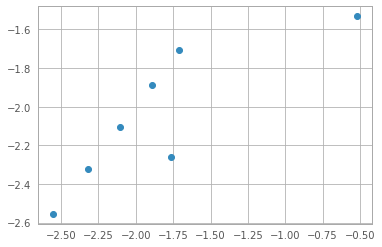

In [50]:
BMT = Table.read('~/notebook/Laptop/Bluminosity-MT2.csv', format='ascii')
BMT = BMT.to_pandas()
plt.scatter(df2['betaP'],BMT['betaP'])

In [45]:
667-41

626

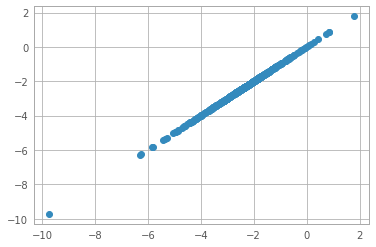

In [47]:
BC = Table.read('~/notebook/Laptop/Bluminosity-C7.csv', format='ascii')
BC = BC.to_pandas()
plt.scatter(df2['betaP'],BC['betaP'])

In [40]:
len(BC[BC['betaP'].isna()])

41

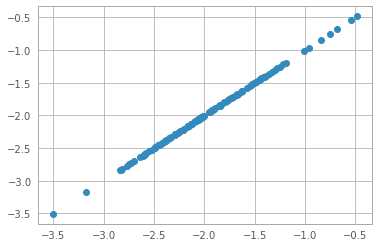

In [29]:
JSN = Table.read('~/notebook/Laptop/Bluminosity_JSN2.csv', format='ascii')
JSN = JSN.to_pandas()
plt.scatter(df2['betaP'],JSN['betaP'])

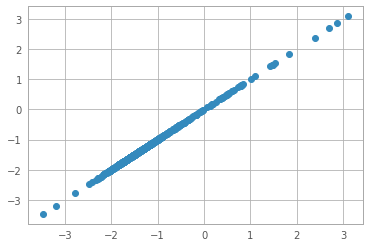

In [24]:
path3 = os.path.expanduser('~/notebook/Laptop/')
BFM = Table.read(os.path.expanduser(path3+'Bluminosity-ZFOURGE.csv'), format='ascii')
BFM=BFM.to_pandas()
plt.scatter(df2['betaP'],BFM['betaP'])

In [30]:
name_B

'JSNH'

In [8]:
c=2.998e8
h= 6.626*10**-27#erg*s (1 J = 10**7 ergs, h is traditionally in units of J*s)
#solar luminosity ~ 3.828 *10**33 erg/s #3.846 *10**33
def integral_above_cutoff(L_nu, nu, const):
    cutoff_freq = c / (91.2e-9)
    mask = nu>cutoff_freq
    nu_above_cutoff = nu[mask]
    L_nu_above_cutoff = L_nu[mask]
    dnu = np.diff(nu_above_cutoff)
#     integrand_above_cutoff = integrand(nu_above_cutoff,L_nu_above_cutoff)
    integrand_above_cutoff = L_nu_above_cutoff[1:]/(h*nu_above_cutoff[1:])
#     print(L_nu_above_cutoff[1:])
    integral = np.sum(dnu*integrand_above_cutoff)
#     integral = np.trapz(integrand_above_cutoff, nu_above_cutoff)
    return -integral/(const)#const was x3.846*10**33

In [22]:
df['L_nuU']
pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
const = df['L_nuU'][pos]
print(df['L_nuU'].iloc[0]/const)

1.3190431411899576e-06


In [28]:
const

7.161744084825787e+27

In [26]:
df['L_nuU']
pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
const = df['L_nuU'][pos]
print(df['L_nuU'].iloc[0]/const)

1.319043141189957e-06


In [25]:
sionx=[]
for i in range(1):
    potato=str(Montague['id'][i])
#     potato=str(17189)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    redshift =float(galaxy_fit.index[6].split()[-1])
#     df = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'),index_col=0,on_bad_lines='skip')
    df=pd.read_csv(os.path.expanduser(patho+potato+'-RF-lum'+name_B),index_col=0,on_bad_lines='skip')
    pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    const = df['L_nuU'][pos]
#     df
    result=integral_above_cutoff(df['L_nuU'], df['nu'], const) #nu is in Hz df['L_nuU']*3.846*10**33
    logresult=log10(result)
    sionx.append(logresult)
df2 = pd.concat([df1,pd.Series(sionx).rename('sion')],axis=1)
# df2.to_csv('Bluminosity_'+str(name_B)+'test.csv',index=False)
print('integration complete')
print('How are you single')
df2

integration complete
How are you single


,id,beta,beta_er,betaU,betaU_er,betaP,betaP_er,bouwen,bouwenA,sion
0,77910,-1.741502,0.024925,-2.354964,0.024662,-1.865693,0.279375,25.520460,24.974901,25.098317
1,84518,-2.549521,0.009677,-2.586471,0.009640,-2.292437,0.296615,25.775118,25.734473,NaN
2,88612,-1.512836,0.026670,-2.365419,0.024517,-0.750239,0.753999,25.531961,24.837702,NaN
3,90354,0.294356,0.032415,-2.437742,0.020813,-2.293543,0.798312,25.611516,23.753386,NaN
4,94574,-2.314442,0.010609,-2.682976,0.009851,-2.201824,0.287684,25.881274,25.475886,NaN
...,...,...,...,...,...,...,...,...,...,...
125,219026,-1.568423,0.026264,-2.304623,0.025132,-1.775671,0.240694,25.465085,24.871054,NaN
126,219038,-2.010785,0.010870,-2.645554,0.009039,-2.061982,0.385636,25.840110,25.141863,NaN
127,219057,-1.780938,0.027366,-2.344245,0.026270,-2.173327,0.390124,25.508669,24.998563,NaN
128,219195,-2.032286,0.021082,-2.273814,0.020722,-1.901890,0.243249,25.431195,25.165515,NaN


In [12]:
name_B

'JSN2'

In [ ]:
plt.scatter(df2['betaP'],df2['sion'])

In [ ]:
# def integral_above_cutoff_2(L_nu, nu):
#     cutoff_freq = c / (91.2e-9)
#     mask = nu>cutoff_freq
#     nu_above_cutoff = nu[mask]
#     L_nu_above_cutoff = L_nu[mask]
#     dnu = np.diff(nu_above_cutoff)
# #     integrand_above_cutoff = integrand(nu_above_cutoff,L_nu_above_cutoff)
#     integrand_above_cutoff = L_nu_above_cutoff[1:]
# #     print(L_nu_above_cutoff[1:])
#     integral = np.sum(dnu*integrand_above_cutoff)
# #     integral = np.trapz(integrand_above_cutoff, nu_above_cutoff)
#     return -integral

# path = os.path.expanduser('~/Documents/ZFOURGE/')
# patho = os.path.expanduser('~/Documents/ZFOURGEB/')
# folder_name = os.path.basename(patho)  # Get the folder name "anshuB"
# name_B = folder_name[:-1]
# Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat'))
# light=2.998*(10**18) #speed of light in Angstroms ~ A/s

    
# sionx=[]
# constx=[]
# for i in range(len(Montague)):
#     potato=str(Montague['id'][i])
# #     potato=str(17189)
#     galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
#     redshift =float(galaxy_fit.index[6].split()[-1])
# #     df = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'),index_col=0,on_bad_lines='skip')
#     df=pd.read_csv(os.path.expanduser(patho+potato+'-RF-lum-ZFOURGE'),index_col=0,on_bad_lines='skip')
# #     df=pd.read_csv(os.path.expanduser(patho+potato+'-RF-lum'+name_B),index_col=0,on_bad_lines='skip')
#     pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
#     const = df['L_nuU'][pos]
#     constx.append(const)
# #     df
#     result=integral_above_cutoff_2(df['L_nuU'], df['nu']) #nu is in Hz df['L_nuU']*3.846*10**33
#     logresult=result
#     sionx.append(logresult)
# df2 = pd.concat([Montague['id'],Montague['redshift'],pd.Series(sionx).rename('sion'),pd.Series(constx).rename('uv')],axis=1)
# df2.to_csv('zLyCINT_'+name_B+'.csv',index=False)
# print('integration complete')
# print('How are you single')
# df2

# path = os.path.expanduser('~/Documents/JSN/')
# patho = os.path.expanduser('~/Documents/JSNB/')
# folder_name = os.path.basename(patho)  # Get the folder name "anshuB"
# name_B = folder_name[:-1]
# Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat'))

# sionx=[]
# constx=[]
# for i in range(len(Montague)):
#     potato=str(Montague['id'][i])
# #     potato=str(17189)
#     galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
#     redshift =float(galaxy_fit.index[6].split()[-1])
# #     df = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'),index_col=0,on_bad_lines='skip')
#     df=pd.read_csv(os.path.expanduser(patho+potato+'-RF-lum-JSN'),index_col=0,on_bad_lines='skip')
#     pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
#     const = df['L_nuU'][pos]
#     constx.append(const)
# #     df
#     result=integral_above_cutoff_2(df['L_nuU'], df['nu']) #nu is in Hz df['L_nuU']*3.846*10**33
#     logresult=result
#     sionx.append(logresult)
# df3 = pd.concat([Montague['id'],Montague['redshift'],pd.Series(sionx).rename('sion'),pd.Series(constx).rename('uv')],axis=1)
# df3.to_csv('zLyCINT2_'+name_B+'.csv',index=False)
# print('integration complete')
# print('How are you still single')
# df3

In [ ]:
fig,ax=FancyPlot('redshift','lyc')
ax.scatter(df2['redshift'],log10(df2['sion']))
ax.scatter(df3['redshift'],log10(df3['sion']))

fig,ax=FancyPlot('redshift','Normalization')
ax.scatter(df2['redshift'],log10(df2['uv']))
ax.scatter(df3['redshift'],log10(df3['uv']))

This is where the plotting starts

In [ ]:
path = os.path.expanduser('~/notebook/Laptop/')
A = Table.read(os.path.expanduser(path+'Anshu-9150-Parameters.csv'), format='ascii')
A=A.to_pandas()
# # a = Table.read(os.path.expanduser(path+'anshu_EELGs_2-Parameters.csv'), format='ascii')
# a = Table.read(os.path.expanduser(path+'anshu_EELGs_3-Parameters.csv'),format='ascii')
# a=a.to_pandas()
# AB = Table.read(os.path.expanduser(path+'Bluminosity_Anshu_control.csv'), format='ascii')
# AB=AB.to_pandas()
# ab = Table.read(os.path.expanduser(path+'Bluminosity_anshu_EELGs.csv'), format='ascii')
# ab=ab.to_pandas()

In [ ]:
fig,ax=FancyPlot(r'$M_{*}/M_\odot$',r'sSFR$/yr^{-1}$')
ax.scatter(log10(A['M(stars)']),log10(A['sSFR']))

In [ ]:
fig,ax=FancyPlot(r'$M_{*}/M_\odot$',r'$M_{*}/M_\odot$ removed')
ax.scatter(log10(a['M(stars)']),log10(ac['M(stars)']),c='aquamarine',s=500,label='control')
ax.plot(linspace(7,10,10),linspace(7,10,10))

In [ ]:
path = os.path.expanduser('~/notebook/Laptop/')
ac = Table.read(os.path.expanduser(path+'anshu_EELGs_4-Parameters.csv'),format='ascii')
ac=ac.to_pandas()

In [ ]:
df2.to_csv('Bluminosity_anshu_EELGs.csv', index=False)

In [ ]:
mpl.rcParams.update({'font.size': 22})

fig,ax=FancyPlot(r'$M_{*}/M_\odot$',r'sSFR/$yr^{-1}$')
ax.scatter(log10(A['M(stars)']),log10(A['sSFR']),c='aquamarine',s=500,label='control')
ax.scatter(log10(a['M(stars)']),log10(a['sSFR']),c='dodgerblue',marker='*',s=500,label='EELGs')
plt.legend()

fig,ax=FancyPlot(r'$M_{*}/M_\odot$',r'SFR/$M_\odot yr^{-1}$')
ax.scatter(log10(A['M(stars)']),log10(A['SFR']),c='aquamarine',s=500,label='control')
ax.scatter(log10(a['M(stars)']),log10(a['SFR']),c='dodgerblue',marker='*',s=500,label='EELGs')
plt.legend()

fig,ax=FancyPlot(r'Photometric $\beta$',r'$log_{10}(\xi_{ion}$/Hz $erg^{-1})$')
ax.errorbar(AB['betaP'],AB['sion'],xerr=AB['betaP_er'],markersize=20,fmt='o',
               ecolor='aquamarine', alpha=1,zorder=1,c='aquamarine',linewidth=4,label='control')
ax.errorbar(ab['betaP'],ab['sion'],xerr=ab['betaP_er'],markersize=20,fmt='*',
               ecolor='dodgerblue', alpha=1,zorder=2,c='dodgerblue',linewidth=4,label='EELGs')
# ax.set_ylim(24.4,25.6)
# ax.set_xlim(-5,3)

This is where I derive the slope and xi_ion

In [ ]:
path = os.path.expanduser('~/Documents/anshu/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 

path2 = os.path.expanduser('~/Documents/')
comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
xy = comp_ew.to_pandas()
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)


# Montague2 = Montague.where(Montague['id'].isin(stuff['id'])).dropna()
for Treesa in range(len(Montague)):
#     potato=str(int(Montague2['id'].iloc[19]))
    potato=str(Montague['id'][Treesa])
#     potato=str(217157)#11999
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=None, header=None,on_bad_lines='skip', skiprows=10,delim_whitespace=True)
    galaxy_sed.columns = ['A', 'B', 'C']
    A=galaxy_sed['A']
    B=galaxy_sed['B']
    C=galaxy_sed['C']
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    galaxy_fit3 = pd.DataFrame(columns=[])
    galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])

    
    
    #SED FILE is in L_lambda/LoA^-1. A is log of the wavelength in angstroms
    
    redshift =float(galaxy_fit.index[6].split()[-1])
    light=2.998*(10**18) #speed of light in Angstroms ~ A/s
    lambda_cA = lambda_c*10000 #central wavelength in Angstroms
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    dist = meters.value
    B = np.array(B)
    A = np.array(A)
    L_lambda = 10**B #L_0/Angstroms
    lambd = 10**A #Angstroms
    L_nu=L_lambda*lambd**2/light #L_0
    f_nu = (L_nu*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
#     f_nu = (L_nu*(3.826*10**26))/(4*pi*dist**2)
    f_nu = f_nu/10**-26
    # print(f_nu)

    C = np.array(C)
    L_lambda2=10**C
    L_nu2=L_lambda2*lambd**2/light
    f_nu2 =(L_nu2*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu2 = f_nu2/10**-26

    f_lambda = light*f_nu/lambd**2
    f_lambda2 = light*f_nu2/lambd**2
    
    
  
    ###################################################
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=23: #14 23
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
    names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    

    test=Table.from_pandas(galaxy_fit2)
    L_nu=[float(s) for s in test[0]] #First row.
    L_nu_err=[float(s) for s in test[1]] #Second row
    L_nu=np.array(L_nu) #Luminosity per unit Hz - L_o/s^-1 = L_o*s This is a flux unit but it's not Janskys. 
    L_nu_err=np.array(L_nu_err)

    L_nu_err=L_nu_err#*(1+redshift)
    lL_lambda_err=L_nu_err*light/lambda_cA


    L_lambda=L_nu*light/(lambda_cA)**2 #L_o*s * A/s /A^2 = L_o/A
    lL_lambda=L_lambda*lambda_cA #A *L_o/A =L_o

    arr = np.array(A) #log(A) from SED file
    arr2 = 10**(arr) #Angstroms (A)
    wavelengths = arr2.tolist() #A
    Qlog=log10(wavelengths) #log(A)
    Atten = np.array(B) #log(L_o/A)
    D = (10**Atten)*wavelengths #L_o/A *A = L_o

    D=D.tolist()
    # D = (10**Atten)*Q #L_o/A *A = L_o     #*10000) #Luminosity per unit lambda
    Unatten = np.array(C)
    E = (10**Unatten)*wavelengths  


    E=E.tolist()     #*10000) #^
    Atten_log=log10(D) #log(L_o)
    Unatten_log=log10(E)
    z=log10(lL_lambda) #log(L_o)
    t=log10(lambda_cA) #log(A)


    L_obs =[float(s) for s in test[2]]#Third Row
    L_obs =np.array(L_obs)
    Res = (L_nu - L_obs)/L_nu
    for i in range(len(Res)):
#         if log10(-Res[i])>5:
#             Res[i]=nan
        if L_nu[i] <0:
            Res[i]=nan
    plt.style.use('dark_background')
    fig,ax1,ax2=StackedPlot('',r'log($\lambda$ L$_\lambda$ /L$_o$ )',r'log($\lambda$/ \AA)','')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim(bottom=10**7, top=10**12)
    ax1.set_xlim(left=10**3.4,right=10**5.1)
#     ax1.rcParams['font.size'] = '18'
    ax1.plot(10**Qlog,10**Atten_log/(1+redshift),label='Attenuated',c='deeppink')
    ax1.plot(10**Qlog,10**Unatten_log/(1+redshift),label='Unattenuated',c='dodgerblue')
    ax1.legend()
#     ax1.scatter(t,z)#,label='*$\lambda$')
    ax1.errorbar(10**t,10**z,yerr=lL_lambda_err,fmt='o',c='aquamarine',ms=17)
    ax1.errorbar(10**t.iloc[33:36],10**z.iloc[33:36], yerr=lL_lambda_err.iloc[33:36],fmt='o',markerfacecolor='red',markeredgecolor='k',ms=17)
    ax1.axvline(x=(redshift*3000+3000),c='salmon')
    ax1.axvline(x=(redshift*1300+1300),c='salmon')
#     axs[1] = plt.axes([0,0,1,1])

    ax1.annotate('z-'+str(redshift),xy=(10**4.8,10**9),size=25)
    ax2.set_xlim(left=3.4,right=5.1)
    
    for i in range(len(Res)):
        if Res[i]>1:
            ax2.arrow(t[i],0,0,1,head_width=0.03, head_length=1, fc='aquamarine', ec='aquamarine')
        if Res[i]<-1:
            ax2.arrow(t[i],0,0,-1,head_width=0.03, head_length=1, fc='aquamarine', ec='aquamarine')
    for i in range(len(Res)):
        if abs(Res[i])>1:
            Res[i]=nan
    ax2.scatter(t,Res,label='Residuals')
    ax2.legend()

In [ ]:
L_nu